In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importando o dataset sobre obesidade

In [233]:
df = pd.read_csv('/content/obesidade_dataset.csv')
df.head(3)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight


In [234]:
df.shape

(2111, 17)

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [236]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Traduzindo as colunas e linhas


In [237]:
df.columns = ['idade','genero', 'altura', 'peso', 'freq_beber_alcool', 'freq_comida_calorica', 'vegetais_na_refeicao','refeicoes_no_dia', 'monita_calorias','fuma','qtde_agua_diaria', 'obsidade_historico_familiar', 'freq_atividade_fisica', 'tempo_celular','come_comida_entre_refeicoes', 'transporte_que_usa', 'nivel_obesidade']
df.sample(3)

,idade,genero,altura,peso,freq_beber_alcool,freq_comida_calorica,vegetais_na_refeicao,refeicoes_no_dia,monita_calorias,fuma,qtde_agua_diaria,obsidade_historico_familiar,freq_atividade_fisica,tempo_celular,come_comida_entre_refeicoes,transporte_que_usa,nivel_obesidade
175,38.000000,Female,1.64000,59.800000,no,yes,2.000000,3.000000,no,no,2.0,yes,2.000000,0.0,Sometimes,Public_Transportation,Normal_Weight
1552,34.576714,Male,1.73325,103.669116,no,yes,2.501224,2.049565,no,no,1.0,yes,1.746583,0.0,Sometimes,Automobile,Obesity_Type_II
372,18.000000,Female,1.62000,58.000000,no,yes,3.000000,3.000000,no,no,1.0,no,0.000000,2.0,Sometimes,Automobile,Normal_Weight


In [238]:
df['genero'].replace(['Female', 'Male'], ['Feminino', 'Masculino'], inplace=True)

In [239]:
df.replace("yes","sim", inplace = True)
df.replace("no","não", inplace = True)
df.replace("Sometimes","às vezes", inplace = True)
df.replace("Frequently","frequentemente", inplace = True)
df.replace("Always","sempre", inplace = True)
df['nivel_obesidade'].replace('Normal_Weight', 'peso normal', inplace = True)
df['nivel_obesidade'].replace('Overweight_Level_I', 'sobrepeso nivel I', inplace = True)
df['nivel_obesidade'].replace('Overweight_Level_II', 'sobrepeso nivel II', inplace = True)
df['nivel_obesidade'].replace('Obesity_Type_I', 'obesidade nivel I', inplace = True)
df['nivel_obesidade'].replace('Insufficient_Weight', 'peso insuficiente', inplace = True)
df['nivel_obesidade'].replace('Obesity_Type_II', 'obesidade nivel II', inplace = True)
df['nivel_obesidade'].replace('Obesity_Type_III', 'obesidade nivel III', inplace = True)

# Filtrando apenas as colunas úteis para a análise

In [240]:
df = df[['nivel_obesidade','idade', 'genero', 'altura', 'peso', 'freq_beber_alcool', 'refeicoes_no_dia', 'fuma', 'obsidade_historico_familiar']]

# **Perguntas**
- Faixa etária com mais obesidade
- Gênero com mais obesidade
- Muitas refeições no dia tem relação com a obesidade?
- Qual a relação entre a obesidade e o consumo de álcool?
- Qual a relação entre ter histórico familiar com obesidade e ser obeso?

# **Faixa etária com mais obesidade**

---


In [241]:
df['nivel_obesidade'].value_counts()

nivel_obesidade
obesidade nivel I      351
obesidade nivel III    324
obesidade nivel II     297
sobrepeso nivel I      290
sobrepeso nivel II     290
peso normal            287
peso insuficiente      272
Name: count, dtype: int64

In [242]:
df.idade.min()
df.idade.max()

61.0

## Criando grupos para cada faixa etária

Excluindo pessoa com 61 anos, pois não faz sentido criar um grupo de pessoas entre
60 a 70 anos se somente uma pessoa está nesse grupo

Isso levaria a uma análise incorreta dos dados porsteriormente

In [254]:
df['idade_agrupada'] = pd.cut(df['idade'], bins = [16,21,26,31,36,41,46,51,56,61], labels = ['16 a 21', '21 a 26', '26 a 31', '31 a 36', '36 a 41', '41 a 46', '46 a 51', '51 a 56', '56 a 61'])
df.dropna().reset_index(drop = True)

,nivel_obesidade,idade,genero,altura,peso,freq_beber_alcool,refeicoes_no_dia,fuma,obsidade_historico_familiar,idade_agrupada,qtd_obesos
0,peso normal,21.000000,Feminino,1.620000,64.000000,não,3.0,não,sim,16 a 21,False
1,peso normal,21.000000,Feminino,1.520000,56.000000,às vezes,3.0,sim,sim,16 a 21,False
2,peso normal,23.000000,Masculino,1.800000,77.000000,frequentemente,3.0,não,sim,21 a 26,False
3,sobrepeso nivel I,27.000000,Masculino,1.800000,87.000000,frequentemente,3.0,não,não,26 a 31,True
4,sobrepeso nivel II,22.000000,Masculino,1.780000,89.800000,às vezes,1.0,não,não,21 a 26,True
...,...,...,...,...,...,...,...,...,...,...,...
2095,obesidade nivel III,20.976842,Feminino,1.710730,131.408528,às vezes,3.0,não,sim,16 a 21,True
2096,obesidade nivel III,21.982942,Feminino,1.748584,133.742943,às vezes,3.0,não,sim,21 a 26,True
2097,obesidade nivel III,22.524036,Feminino,1.752206,133.689352,às vezes,3.0,não,sim,21 a 26,True
2098,obesidade nivel III,24.361936,Feminino,1.739450,133.346641,às vezes,3.0,não,sim,21 a 26,True


In [244]:
df['qtd_obesos'] = df['nivel_obesidade'].apply(lambda x: True if x in ['sobrepeso nivel I', 'sobrepeso nivel II',
                                                                             'obesidade nivel I', 'obesidade nivel II',
                                                                             'obesidade nivel III'] else False)

<ipython-input-244-79264a4235e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['qtd_obesos'] = df['nivel_obesidade'].apply(lambda x: True if x in ['sobrepeso nivel I', 'sobrepeso nivel II',


In [245]:
df.idade_agrupada.value_counts()

idade_agrupada
21 a 26    843
16 a 21    759
26 a 31    203
31 a 36    139
36 a 41    122
41 a 46     21
51 a 56      7
46 a 51      5
56 a 61      1
Name: count, dtype: int64

<Axes: xlabel='qtd_obesos', ylabel='idade_agrupada'>

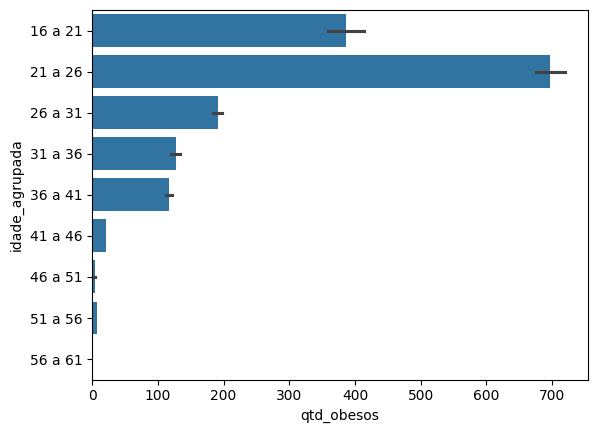

In [246]:
sns.barplot(data = df, x = 'qtd_obesos', y = 'idade_agrupada', estimator = 'sum', orient = 'h')

### *De acordo com essa base de dados, a obesidade é vista principalmente na faixa etária de 21 a 26 anos de idade*

# **Gênero com mais obesidade**

---


<Axes: xlabel='genero', ylabel='qtd_obesos'>

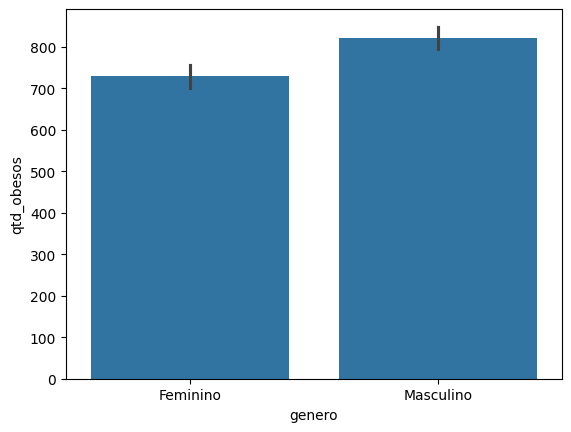

In [247]:
sns.barplot(data = df, y = 'qtd_obesos', x = 'genero', estimator = 'sum')

### *Existe pouca diferença, porém o gênero masculino é o que possui mais pessoas obesas*

# **Muitas refeições no dia tem relação com a obesidade?**

---


<Axes: xlabel='refeicoes_no_dia', ylabel='nivel_obesidade'>

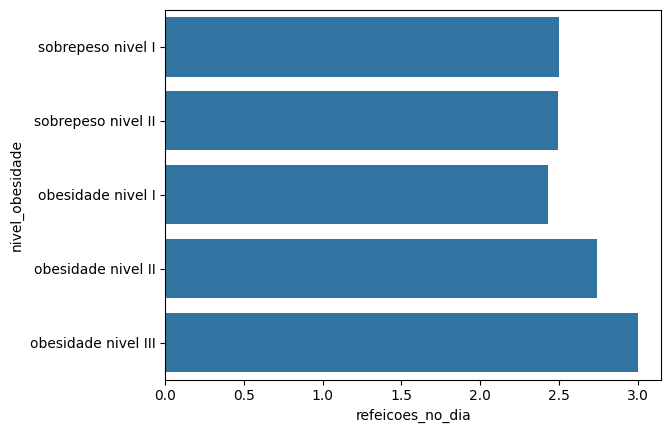

In [248]:
df_refeicoes = df[['nivel_obesidade', 'refeicoes_no_dia']].groupby('nivel_obesidade').mean().T[['sobrepeso nivel I', 'sobrepeso nivel II',
                                                                                 'obesidade nivel I', 'obesidade nivel II',
                                                                                 'obesidade nivel III']].T
sns.barplot(data = df_refeicoes, x = 'refeicoes_no_dia', y = df_refeicoes.index)


### *É possível observar que quanto pior o nível da obesidade, mais refeições são feitas em um dia*

# **Qual a relação entre a obesidade e o consumo de álcool?**

---

<Axes: xlabel='freq_beber_alcool', ylabel='qtd_obesos'>

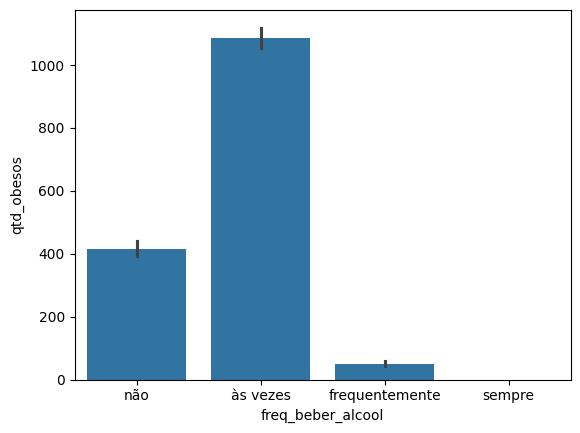

In [253]:
df[['qtd_obesos', 'freq_beber_alcool']]
sns.barplot(data=df, x = 'freq_beber_alcool', y = 'qtd_obesos', estimator = 'sum')

### *Pode-se pensar que o álcool é um dos fatores que levam à obesidade, pois a maioria dos obesos bebem álcool (às vezes ou frequentemente)*

# **Qual a relação entre ter histórico familiar com obesidade e ser obeso?**

---

<Axes: xlabel='obsidade_historico_familiar', ylabel='qtd_obesos'>

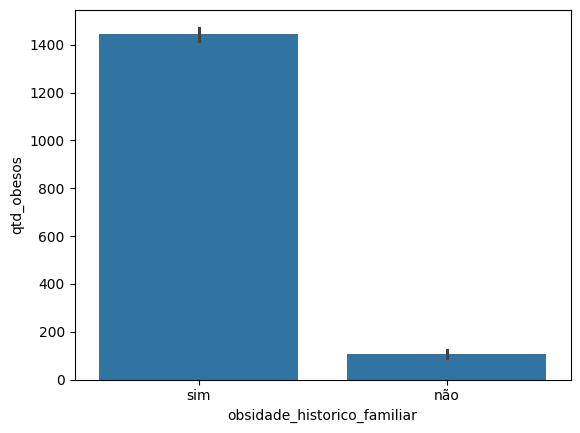

In [250]:
df[['qtd_obesos', 'freq_beber_alcool']]
sns.barplot(data=df, x = 'obsidade_historico_familiar', y = 'qtd_obesos', estimator = 'sum')

In [251]:
df_historico = df.groupby(by = 'obsidade_historico_familiar')['qtd_obesos'].count().to_frame()
df_historico['obesidade (em %)'] = round((df_historico['qtd_obesos'] / sum(df_historico['qtd_obesos'])) * 100, 2)
df_historico['obesidade (em %)']

obsidade_historico_familiar
não    18.24
sim    81.76
Name: obesidade (em %), dtype: float64

### *De acordo com os dados coletados, aproximadamente 81,76% das pessoas com obesidade possuem parentes / familaires também com obesidade*